# FASE 01 - ANÁLISE EXPLORATÓRIA DE DADOS

## AULA 01 - ACQUISIÇÃO E LEITURA DE DADOS REAIS

In [93]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format #FORMATTING DECIMAL PLACES VISIBILITY

In [13]:
dados = pd.read_csv('../data/A152918189_28_143_208.csv',
                    encoding='ISO-8859-1', #SETTING BRAZILIAN ENCODING
                    skiprows=3, #SKIPING USELESS ROWS AT THE BEGINNING OF THE FILE
                    sep=';', #SETTING SEPARATOR
                    skipfooter=12, #IGNORING USELESS ROWS AT THE END OF THE FILE
                    thousands='.', #SETTING PROPER THOUSAND SEPARATOR
                    decimal=',', #SETTING PROPER DECIMAL SEPARATOR
                    engine="python") #CHANING ENGINE FROM 'C' TO 'PYTHON' TO AVOID WARNINGS

In [90]:
dados.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,...,2021/Jan,2021/Fev,2021/Mar,2021/Abr,2021/Mai,2021/Jun,2021/Jul,2021/Ago,2021/Set,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,...,9858841.18,9806315.07,14946369.28,15552930.66,16269008.71,15380532.08,14228814.25,12427865.05,10345616.78,1088059702.25
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,...,3715723.12,3538427.92,4077045.92,6307616.67,6354514.15,3461663.11,4979239.30,4138751.64,-,475290315.34
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,...,21621697.26,26163677.75,23445832.76,23154039.32,26127701.15,26447055.27,24457791.81,22731356.54,19840265.30,2061943006.93
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,...,3266928.47,3519773.73,4437161.10,5171370.92,4266254.94,3103979.88,3743330.65,3781921.16,3150835.05,352546288.71
4,15 Pará,18864744.11,19553758.20,21937342.70,20842829.69,23249952.88,23240687.56,24002223.56,23341218.03,25172261.32,...,38813794.18,39251569.26,40639703.77,46608262.09,55310881.51,48215050.10,45801750.84,43262884.30,14569318.55,4968811817.17


In [30]:
dados.mean()

C:\Users\refelipe\AppData\Local\Temp\ipykernel_10192\3010149702.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dados.mean()


2008/Jan     15126846.64
2008/Fev     22710158.12
2008/Mar     24594187.35
2008/Abr     25431957.83
2008/Mai     26511245.91
                ...     
2021/Mai     79540074.51
2021/Jun     82724335.66
2021/Jul     81601322.73
2021/Ago     75035922.89
Total      6852328259.77
Length: 164, dtype: float64

### ! Challenge: show mean for the most recent date

In [36]:
'{} - {}'.format(dados.mean().index[-2], dados.mean().values[-2])

C:\Users\refelipe\AppData\Local\Temp\ipykernel_10192\2587429231.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  '{} - {}'.format(dados.mean().index[-2], dados.mean().values[-2])


'2021/Ago - 75035922.89037038'

In [89]:
last_date = dados.columns[-2]
last_date

'2021/Set'

***

## AULA 02 - PRIMEIRAS VISUALIZAÇÕES DE DADOS

<AxesSubplot:xlabel='Unidade da Federação'>

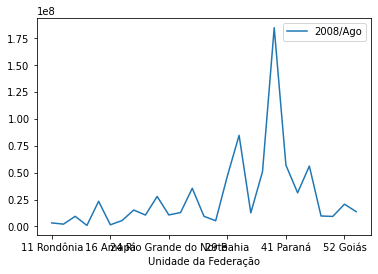

In [95]:
dados.plot(x='Unidade da Federação', y='2008/Ago')

### IMPORTING NEW LIBRARY TO IMPROVE VISUALIZATION

In [105]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker #USED TO FORMAT VALUES

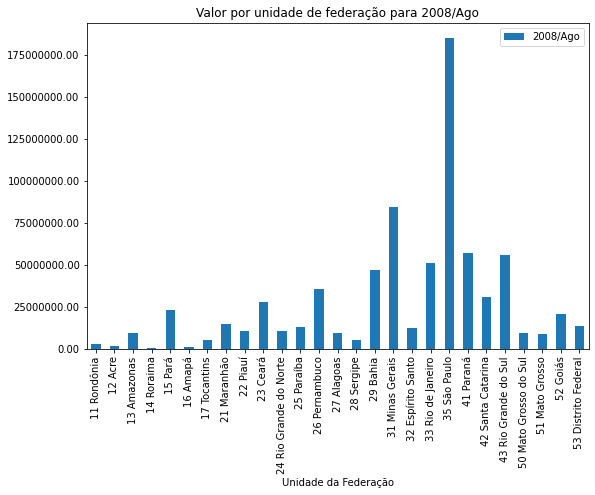

In [106]:
axis = dados.plot(x='Unidade da Federação', y='2008/Ago', kind='bar', figsize=(9,6))
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}')) #FORMATTING Y AXIS

plt.title('Valor por unidade de federação para 2008/Ago')
plt.show()

### ! Challenge:
    - Make the same chart with same data from last class, considering most recent date ignoring the Total column
    - Rotate X axis to facilitate reading

In [113]:
last_date

'2021/Set'

In [125]:
""" Handling with strange value in the column from most recent date, there is a string " - ".
    It is not possible to plot this column if this value remain, I decided to replace it by 0.
"""
dados[last_date] = dados[last_date].replace('-', '0').astype('float64')

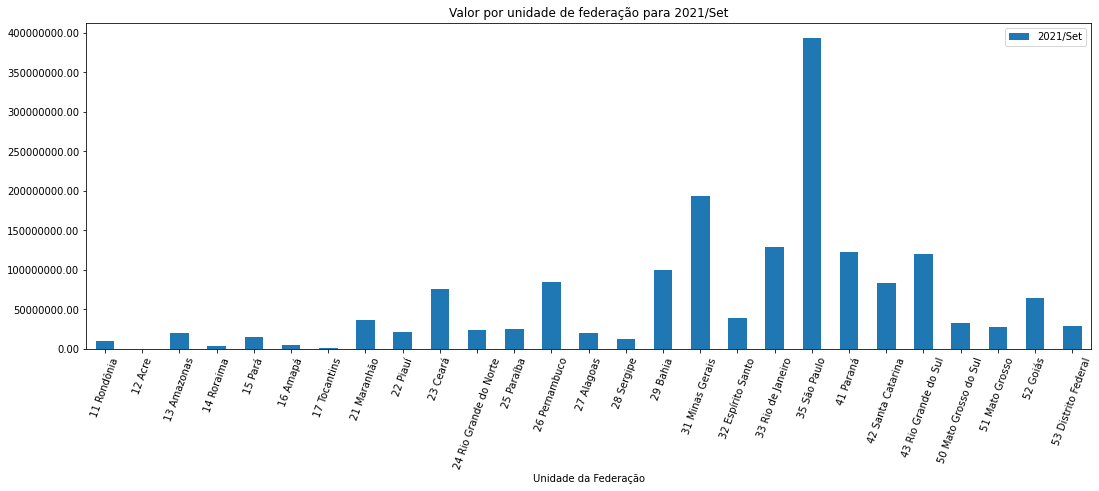

In [150]:
axis = dados.plot(x='Unidade da Federação', y=f'{last_date}', kind='bar', figsize=(18,6), rot=70) #USING ROT TO ROTATE X AXIS TEXT
axis.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.2f}')) #FORMATTING Y AXIS

plt.title(f'Valor por unidade de federação para {last_date}')
plt.show()